In [3]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import plotly.express as px 
import seaborn as sns
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier,NeighborhoodComponentsAnalysis,LocalOutlierFactor
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

C:\Users\yadpu\AppData\Local\Temp\ipykernel_3404\786101201.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Loading Data

In [4]:
wine=pd.read_csv("winequality-red.csv")

# EDA

In [5]:
wine

,qfixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   qfixed acidity        1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
wine.shape

(1599, 12)

In [8]:
print("Number of Rows : ",wine.shape[0])
print("Number of  Columns  : ",wine.shape[1])


Number of Rows :  1599
Number of  Columns  :  12


In [9]:
wine.head()

,qfixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
wine.tail()

,qfixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


# Description

In [11]:
wine.describe()

,qfixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [12]:
wine.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
qfixed acidity,1599.000000,8.319637,1.741096,4.600000,7.100000,7.900000,9.200000,15.900000
volatile acidity,1599.000000,0.527821,0.179060,0.120000,0.390000,0.520000,0.640000,1.580000
citric acid,1599.000000,0.270976,0.194801,0.000000,0.090000,0.260000,0.420000,1.000000
residual sugar,1599.000000,2.538806,1.409928,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1599.000000,0.087467,0.047065,0.012000,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,1599.000000,15.874922,10.460157,1.000000,7.000000,14.000000,21.000000,72.000000
total sulfur dioxide,1599.000000,46.467792,32.895324,6.000000,22.000000,38.000000,62.000000,289.000000
density,1599.000000,0.996747,0.001887,0.990070,0.995600,0.996750,0.997835,1.003690
pH,1599.000000,3.311113,0.154386,2.740000,3.210000,3.310000,3.400000,4.010000
sulphates,1599.000000,0.658149,0.169507,0.330000,0.550000,0.620000,0.730000,2.000000


In [13]:
wine.dtypes

qfixed acidity          float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [14]:
wine.duplicated().sum()

240

In [15]:

wine.skew()

qfixed acidity          0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [16]:
wine.columns

Index(['qfixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Numeric Columns

In [17]:
n_Columns=wine.select_dtypes(include=['int64','float64']).columns
print("Numeric Columns :",n_Columns)

Numeric Columns : Index(['qfixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


# Categorical Columnns

In [18]:
categorical_columns = []
for column in wine.columns:
    if wine[column].nunique() <= 12:  
        categorical_columns.append(column)

print("Categorical Columns:", categorical_columns)


Categorical Columns: ['quality']


# Finding Null Values

In [19]:
wine.isnull()

,qfixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [20]:
wine.isnull().sum()

qfixed acidity          0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [21]:
wine.groupby('quality').mean()

,qfixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [22]:
red_wine=wine['quality'].value_counts().reset_index(
)
red_wine.head(6)

,quality,count
0,5,681
1,6,638
2,7,199
3,4,53
4,8,18
5,3,10


# Data Analysis 

<Axes: xlabel='quality', ylabel='count'>

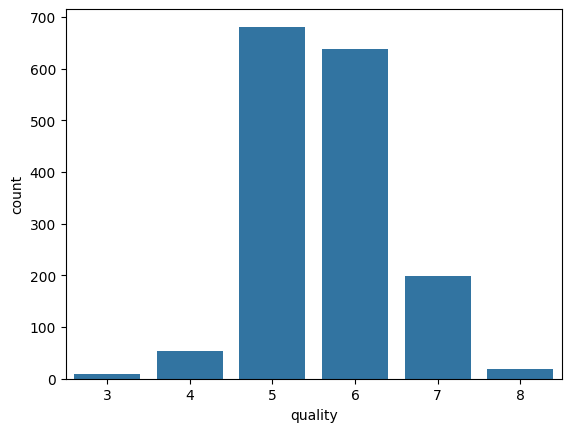

In [23]:
sns.barplot(x='quality',data=red_wine,y='count')


# Histogram

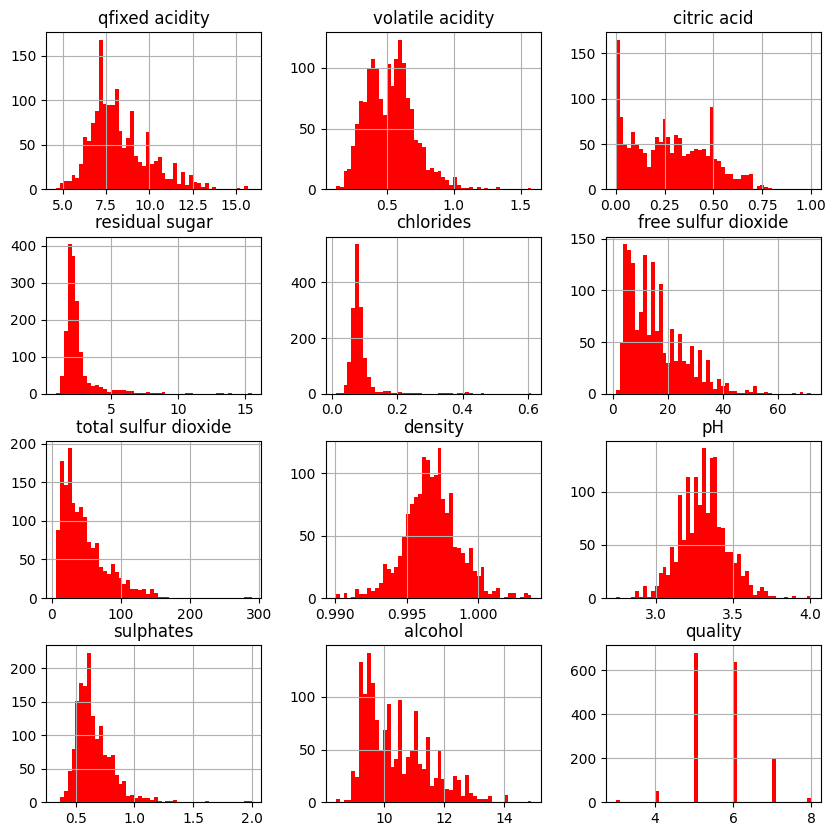

In [24]:
colors=['r']
wine.hist(figsize=(10,10),bins=50,color=colors)
plt.show()

# Data Cleaning

In [25]:
row_3=wine[wine['quality']==3]
row_4=wine[wine['quality']==4]
row_3['quality']=7
row_4['quality']=7
merge3_4=pd.concat([wine,row_3,row_4])
merge3_4=merge3_4[~((merge3_4['quality']==3) | (merge3_4['quality']==4))]

merge3_4.reset_index(drop=True,inplace=True)
data1= merge3_4['quality'].value_counts()
print("New quality data values:")
print(data1)


New quality data values:
quality
5    681
6    638
7    262
8     18
Name: count, dtype: int64


C:\Users\yadpu\AppData\Local\Temp\ipykernel_3404\1092816771.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row_3['quality']=7
C:\Users\yadpu\AppData\Local\Temp\ipykernel_3404\1092816771.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row_4['quality']=7


<Axes: xlabel='quality'>

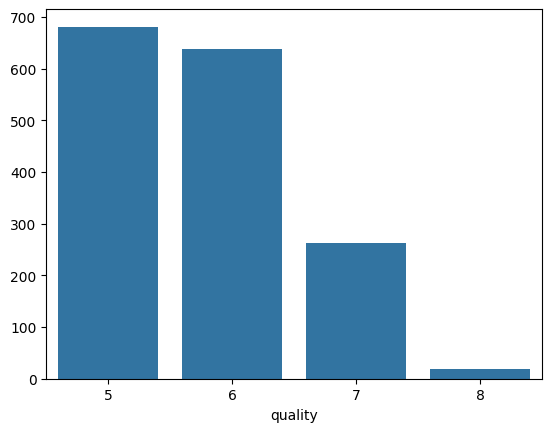

In [26]:

sns.barplot(x=data1.index, y=data1.values)


In [27]:
red_wine = data1.reset_index()
red_wine.columns = ['quality', 'count']

red_wine.head(5)

,quality,count
0,5,681
1,6,638
2,7,262
3,8,18


# Outlier Detection

qfixed acidity             Axes(0.125,0.712609;0.168478x0.167391)
volatile acidity        Axes(0.327174,0.712609;0.168478x0.167391)
citric acid             Axes(0.529348,0.712609;0.168478x0.167391)
residual sugar          Axes(0.731522,0.712609;0.168478x0.167391)
chlorides                  Axes(0.125,0.511739;0.168478x0.167391)
free sulfur dioxide     Axes(0.327174,0.511739;0.168478x0.167391)
total sulfur dioxide    Axes(0.529348,0.511739;0.168478x0.167391)
density                 Axes(0.731522,0.511739;0.168478x0.167391)
pH                          Axes(0.125,0.31087;0.168478x0.167391)
sulphates                Axes(0.327174,0.31087;0.168478x0.167391)
alcohol                  Axes(0.529348,0.31087;0.168478x0.167391)
quality                  Axes(0.731522,0.31087;0.168478x0.167391)
dtype: object

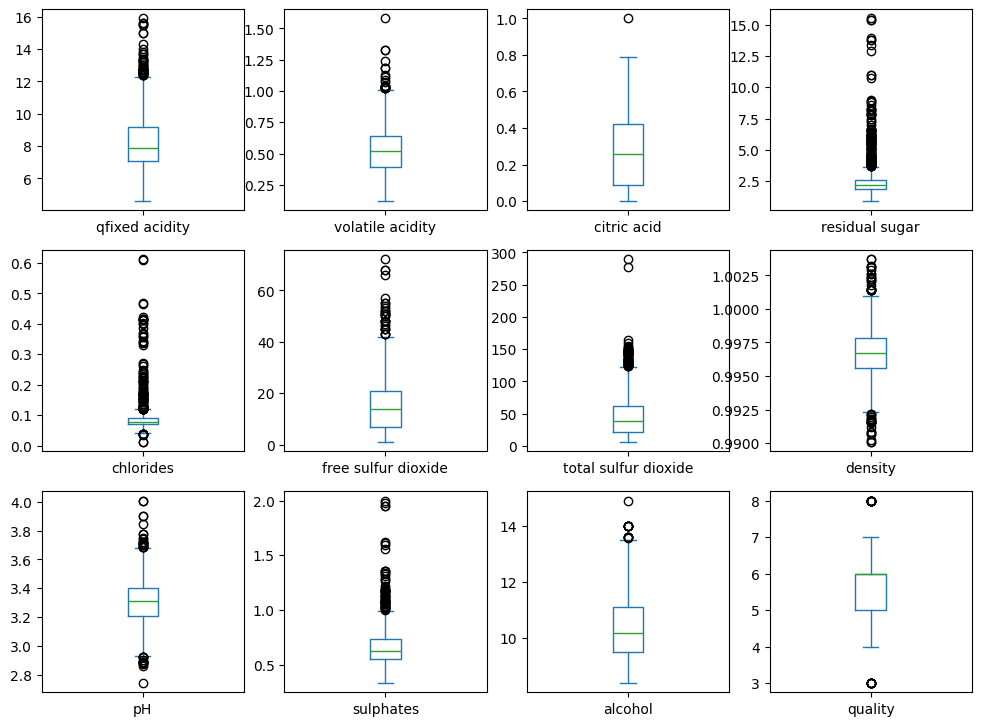

In [28]:
wine.plot(kind ='box',subplots = True, layout =(4,4),sharex = False,figsize=(12,12))

# Outlier Removal

In [29]:
from scipy import stats
z_scores = stats.zscore(wine)

threshold = 3

outlier_rows = (abs(z_scores) > threshold).any(axis=1)

wine_no_outliers = wine[~outlier_rows]

print("Shape of DataFrame after removing outliers:", wine_no_outliers.shape)

Shape of DataFrame after removing outliers: (1451, 12)


qfixed acidity             Axes(0.125,0.712609;0.168478x0.167391)
volatile acidity        Axes(0.327174,0.712609;0.168478x0.167391)
citric acid             Axes(0.529348,0.712609;0.168478x0.167391)
residual sugar          Axes(0.731522,0.712609;0.168478x0.167391)
chlorides                  Axes(0.125,0.511739;0.168478x0.167391)
free sulfur dioxide     Axes(0.327174,0.511739;0.168478x0.167391)
total sulfur dioxide    Axes(0.529348,0.511739;0.168478x0.167391)
density                 Axes(0.731522,0.511739;0.168478x0.167391)
pH                          Axes(0.125,0.31087;0.168478x0.167391)
sulphates                Axes(0.327174,0.31087;0.168478x0.167391)
alcohol                  Axes(0.529348,0.31087;0.168478x0.167391)
quality                  Axes(0.731522,0.31087;0.168478x0.167391)
dtype: object

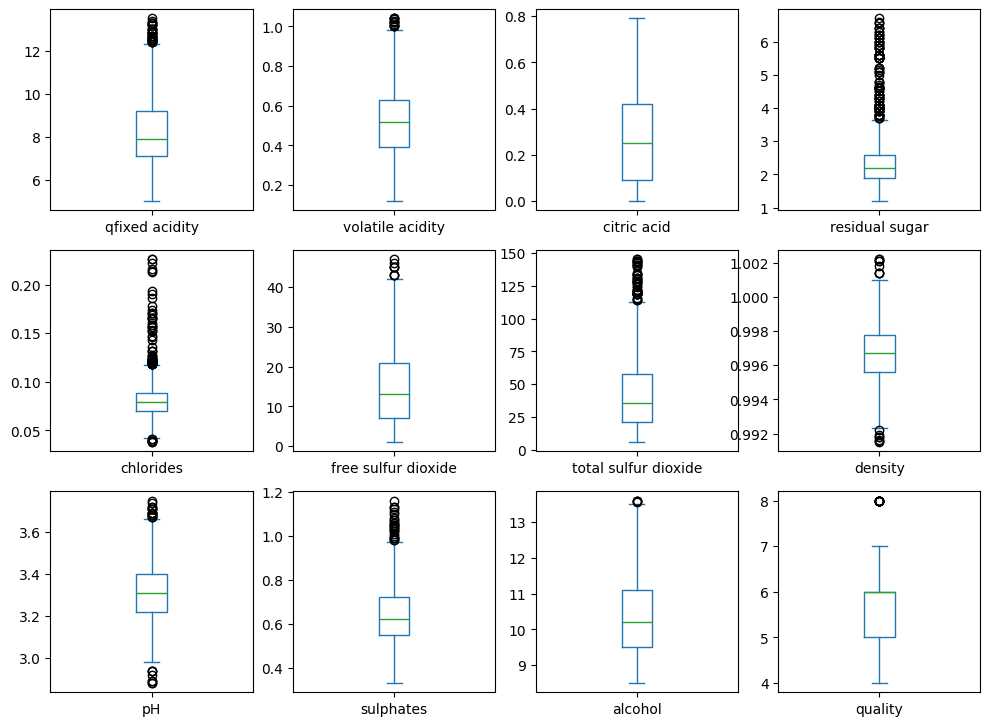

In [30]:
wine_no_outliers.plot(kind ='box',subplots = True, layout =(4,4),sharex = False,figsize=(12,12))

# Pie plot

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64
Imbalace ratio:1.68


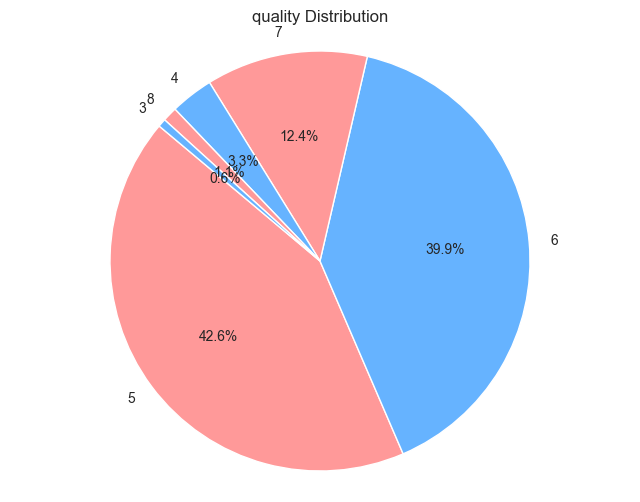

<Axes: xlabel='quality', ylabel='count'>

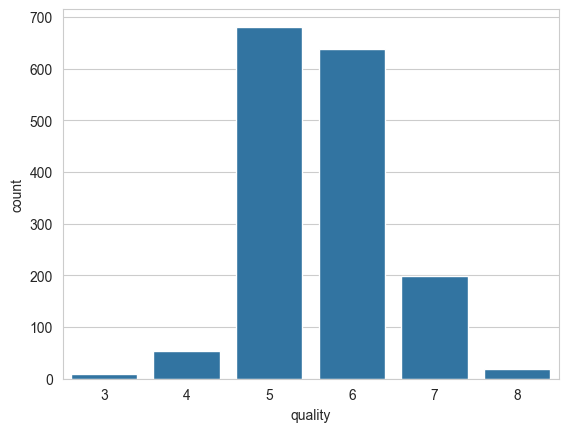

In [31]:
# pIE plot for before cleaing
sns.set_style('whitegrid')

quality_counts = wine['quality'].value_counts()
print(quality_counts)
print("Imbalace ratio:1.68")
plt.figure(figsize=(8, 6)) 
plt.pie(quality_counts, labels=quality_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])  # Plot the pie chart
plt.axis('equal') 
plt.title('quality Distribution') 
plt.show() ; sns.countplot(x='quality',data=wine,)

quality
5    681
6    638
7    262
8     18
Name: count, dtype: int64
Imbalace ratio:1.68


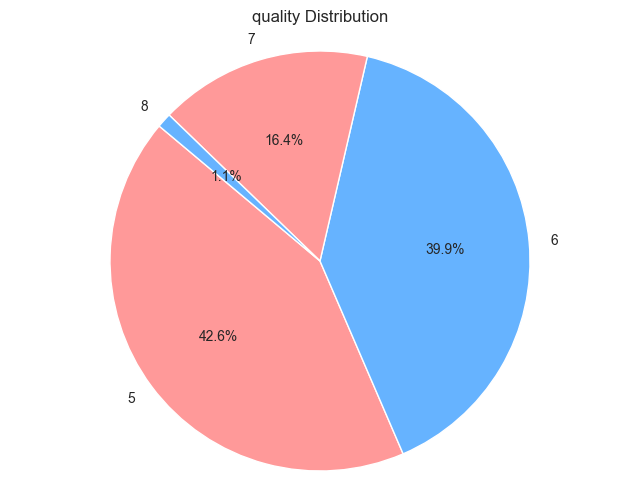

<Axes: xlabel='quality', ylabel='count'>

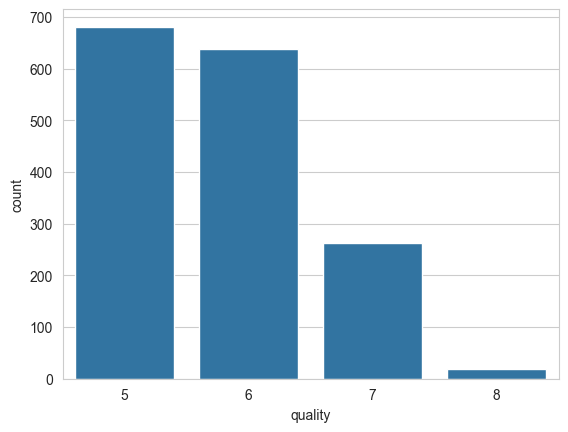

In [32]:
# pIE plot for after cleaing
sns.set_style('whitegrid')

quality_counts = merge3_4['quality'].value_counts()
print(quality_counts)
print("Imbalace ratio:1.68")
plt.figure(figsize=(8, 6)) 
plt.pie(quality_counts, labels=quality_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])  # Plot the pie chart
plt.axis('equal') 
plt.title('quality Distribution') 
plt.show() ; sns.countplot(x='quality',data=merge3_4,)

In [33]:
wine.corr()

,qfixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
qfixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [34]:
df_mean=merge3_4.iloc[:,0:5]
df_se=merge3_4.iloc[:,5:10]
df_worst=merge3_4.iloc[:,11:] #can use wine data it have uncleaned data(which affects result of quality)

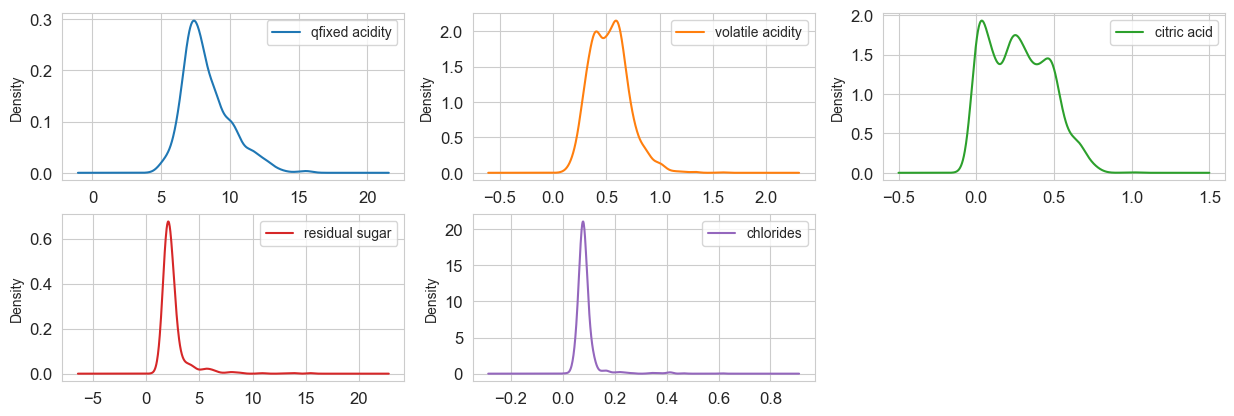

In [35]:
plt = df_mean.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                    sharey=False, fontsize=12, figsize=(15,10))

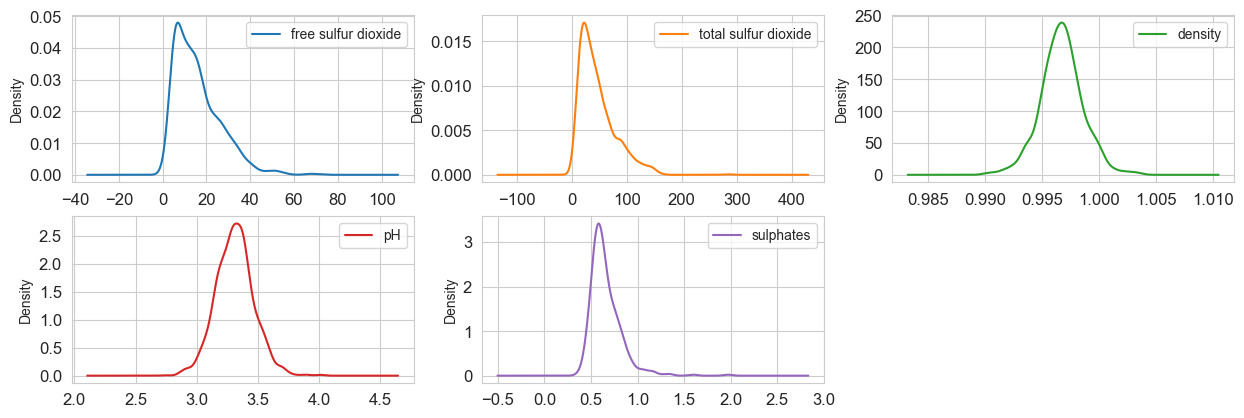

In [36]:

plt = df_se.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                    sharey=False, fontsize=12, figsize=(15,10))

Text(0.5, 0, 'Quality')

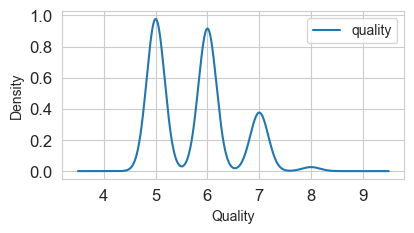

In [37]:
plt = df_worst.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                    sharey=False, fontsize=12, figsize=(15,10))
plt[0, 0].set_xlabel('Quality')


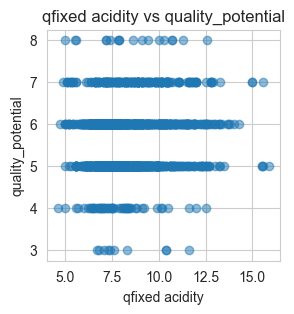

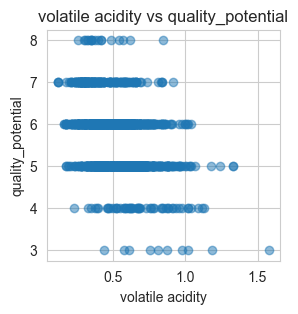

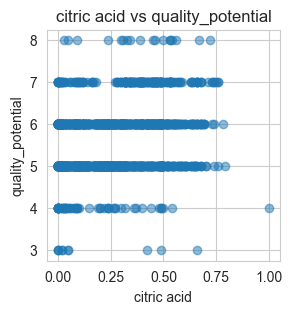

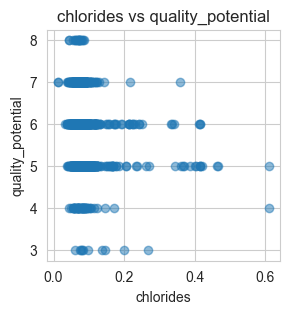

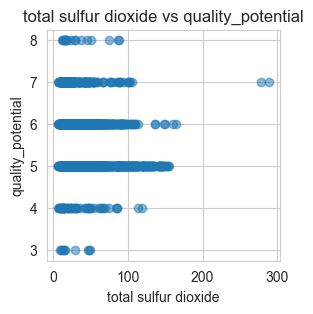

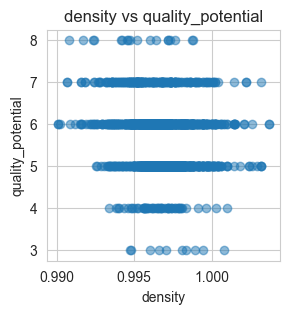

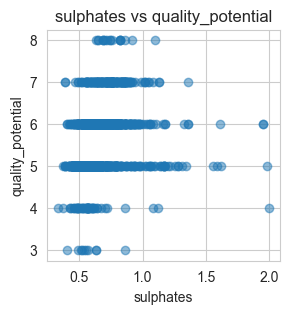

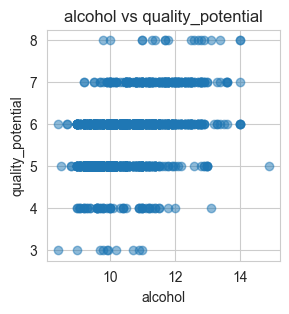

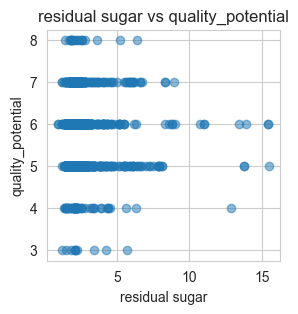

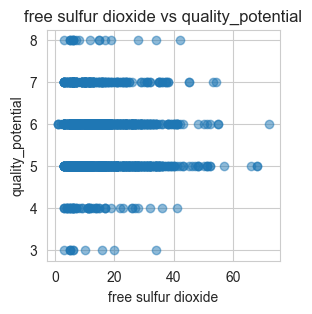

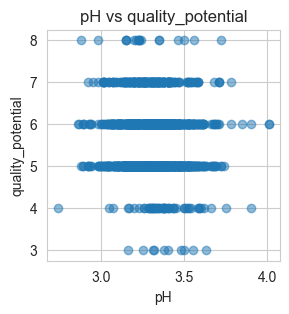

In [38]:
import matplotlib.pyplot as plt

features = ["qfixed acidity","volatile acidity","citric acid","chlorides","total sulfur dioxide","density","sulphates","alcohol","residual sugar","free sulfur dioxide","pH"]  
quality_potential = 'quality' 


for feature in features:
    plt.figure(figsize=(3,3)) 
    plt.scatter(wine[feature], wine[quality_potential], alpha=0.5)
    plt.title(f'{feature} vs quality_potential')
    plt.xlabel(feature)
    plt.ylabel('quality_potential')
    plt.grid(True)
    plt.show()

# Visulation after cleanig

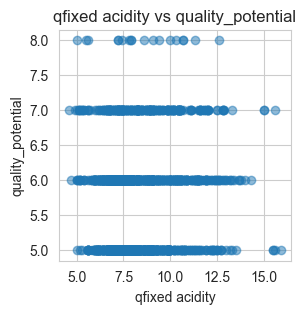

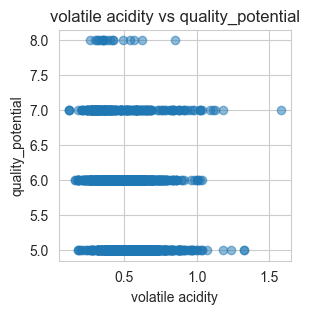

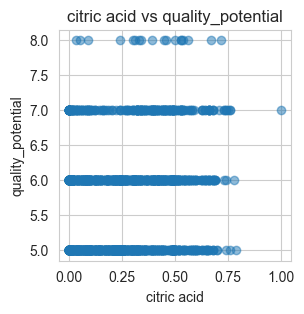

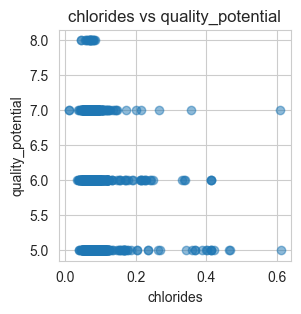

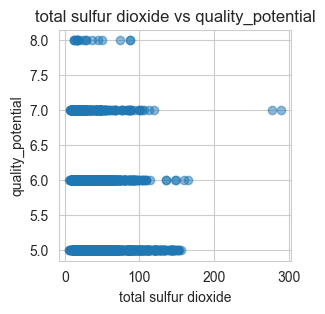

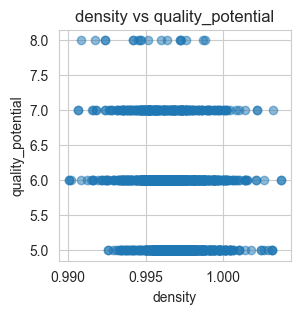

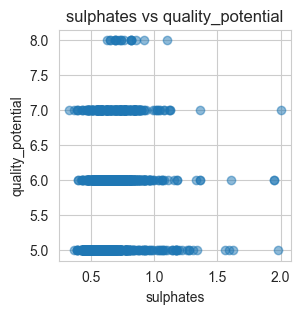

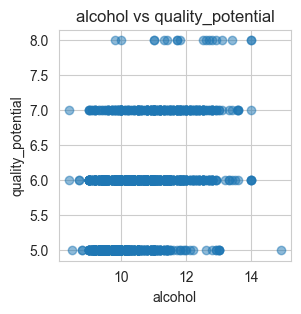

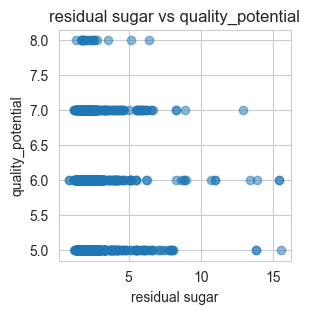

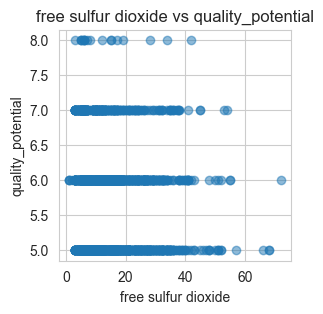

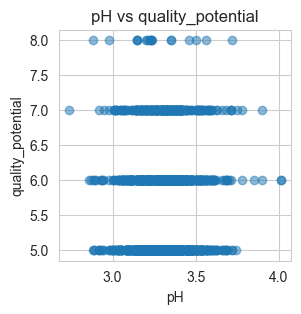

In [39]:
import matplotlib.pyplot as plt

features = ["qfixed acidity","volatile acidity","citric acid","chlorides","total sulfur dioxide","density","sulphates","alcohol","residual sugar","free sulfur dioxide","pH"]  
quality_potential = 'quality' 


for feature in features:
    plt.figure(figsize=(3,3)) 
    plt.scatter(merge3_4[feature], merge3_4[quality_potential], alpha=0.5)
    plt.title(f'{feature} vs quality_potential')
    plt.xlabel(feature)
    plt.ylabel('quality_potential')
    plt.grid(True)
    plt.show()

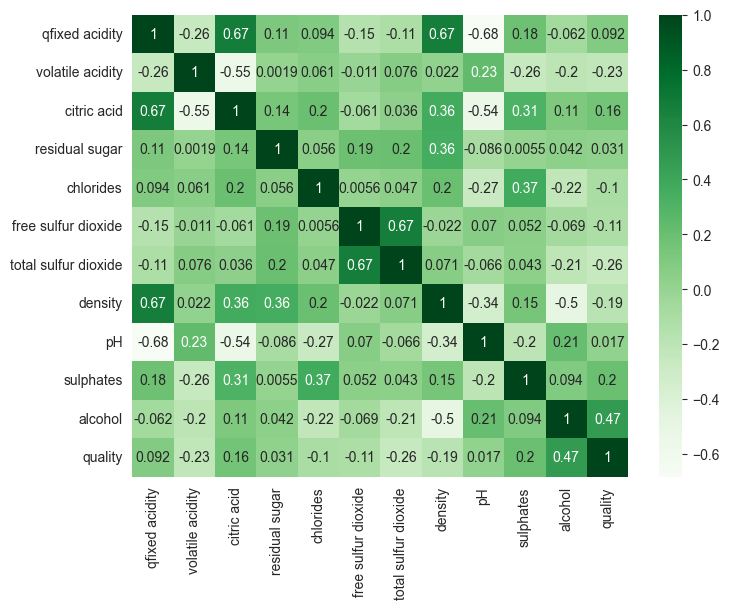

In [40]:
plt.figure(figsize=(8,6))
sns.heatmap(merge3_4.corr(),annot=True,cmap="Greens")
plt.show()

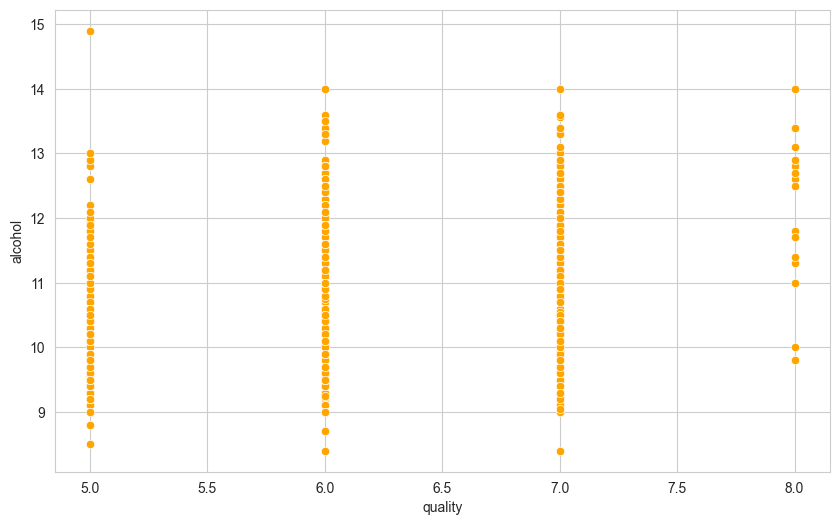

In [41]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='quality',y='alcohol',data=merge3_4,color="Orange")
plt.show()

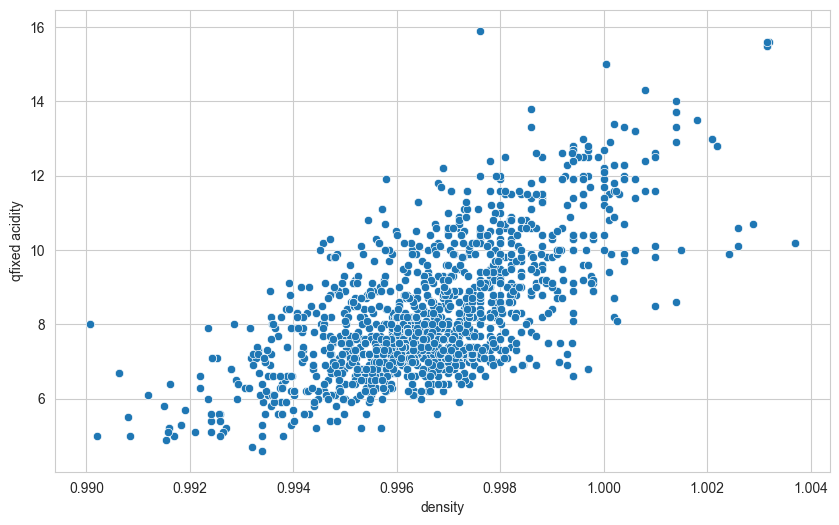

In [42]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='density',y='qfixed acidity',data=merge3_4)
plt.show()

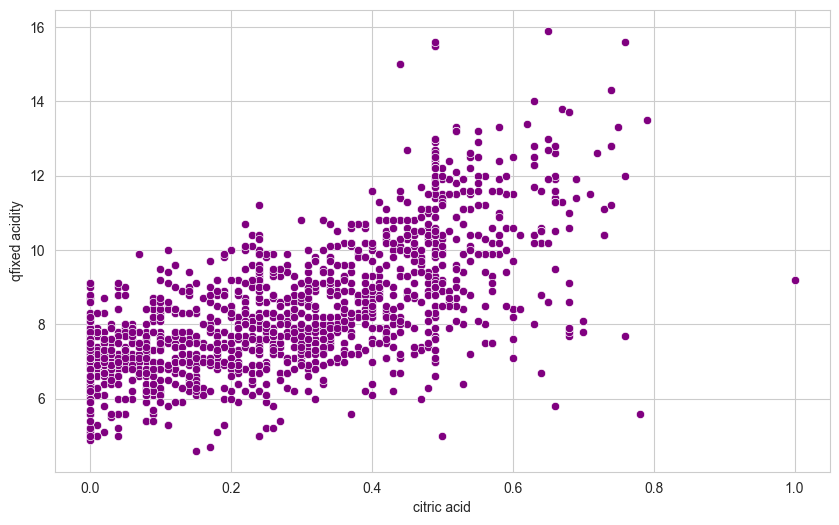

In [43]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='citric acid',y='qfixed acidity',data=merge3_4,color="Purple")
plt.show()

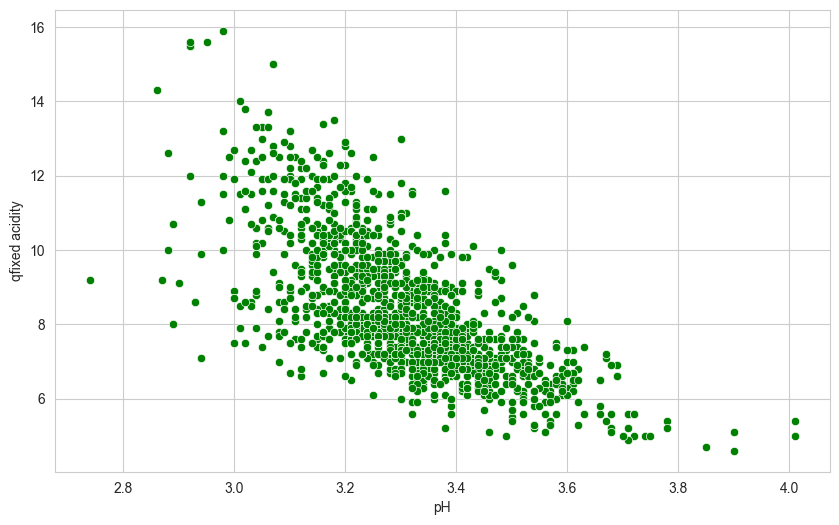

In [44]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='pH',y='qfixed acidity',data=merge3_4,color="Green")
plt.show()

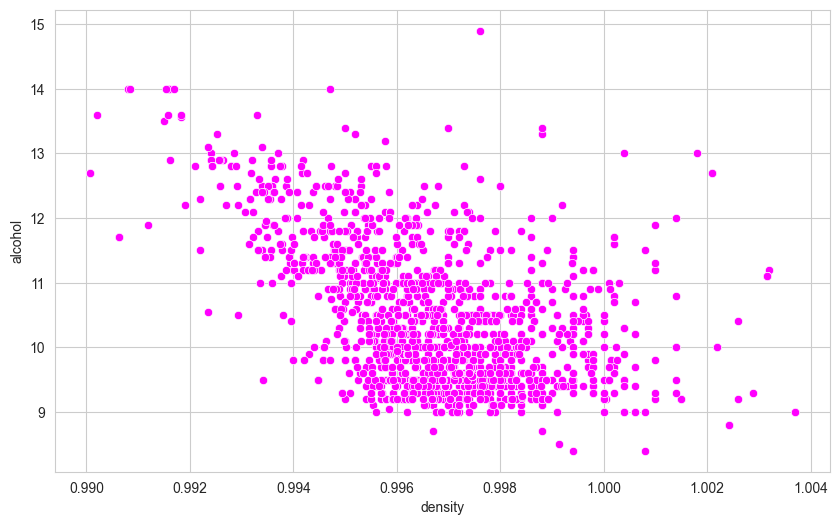

In [45]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='density',y='alcohol',data=merge3_4,color="Magenta")
plt.show()

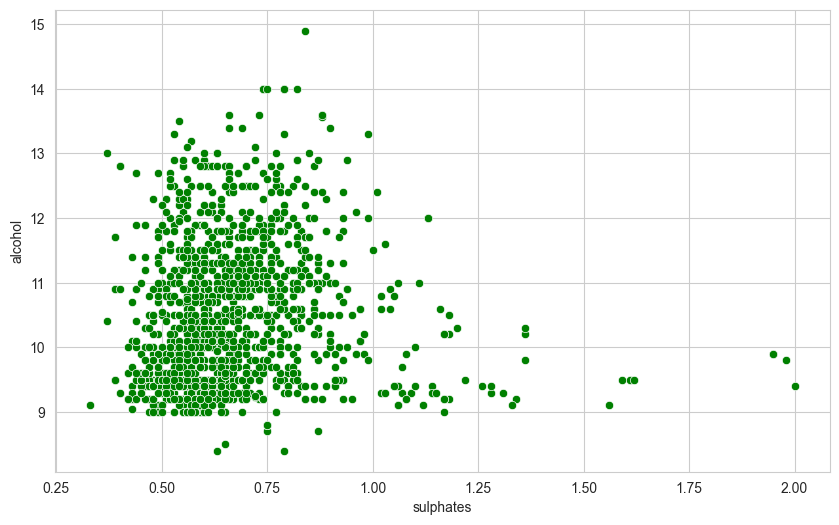

In [46]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='sulphates',y='alcohol',data=merge3_4,color="Green")
plt.show()

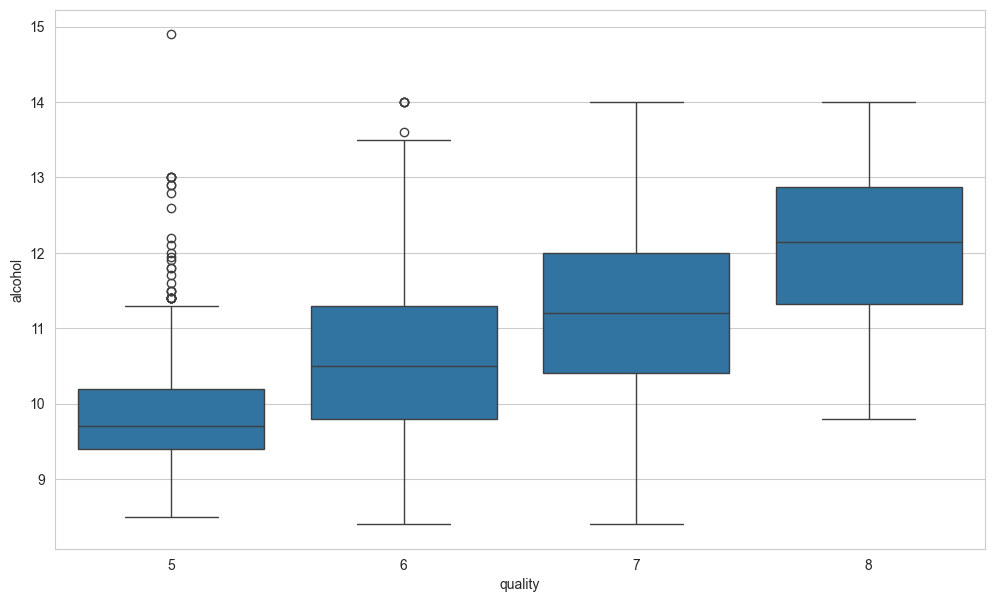

In [47]:
plt.figure(figsize=(12,7))
sns.boxplot(x='quality',y='alcohol',data=merge3_4)
plt.show()

In [48]:
data2 = merge3_4.groupby('quality').agg({"qfixed acidity":"mean", "volatile acidity":"mean", "citric acid":"mean", "chlorides":"mean", "total sulfur dioxide":"mean", "density":"mean", "sulphates":"mean", "alcohol":"mean", "residual sugar":"mean", "free sulfur dioxide":"mean", "pH":"mean"})
data2


,qfixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,residual sugar,free sulfur dioxide,pH
quality,,,,,,,,,,,
5,8.167254,0.577041,0.243686,0.092736,56.513950,0.997104,0.620969,9.899706,2.528855,16.983847,3.304949
6,8.347179,0.497484,0.273824,0.084956,40.869906,0.996615,0.675329,10.629519,2.477194,15.711599,3.318072
7,8.631679,0.480935,0.326718,0.081191,34.881679,0.996245,0.705420,11.165331,2.712023,13.568702,3.313206
8,8.566667,0.423333,0.391111,0.068444,33.444444,0.995212,0.767778,12.094444,2.577778,13.277778,3.267222


In [49]:
comparison_result=data2.loc[5] > data2.loc[8] 
comparison_result

qfixed acidity          False
volatile acidity         True
citric acid             False
chlorides                True
total sulfur dioxide     True
density                  True
sulphates               False
alcohol                 False
residual sugar          False
free sulfur dioxide      True
pH                       True
dtype: bool

# Outliers

In [50]:
wine

,qfixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [51]:
y = wine.quality
x = wine.drop(["quality"],axis=1)
# columns = x.columns.tolist()


In [52]:
clf = LocalOutlierFactor()

In [53]:
y_pred = clf.fit_predict(x)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [54]:
x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score
outlier_score

,score
0,-1.029996
1,-1.008369
2,-1.009488
3,-1.031575
4,-1.029996
...,...
1594,-1.071031
1595,-1.064588
1596,-1.097675
1597,-1.075893


In [55]:

threshold = -2
filter_ = outlier_score["score"] < threshold
outlier_index = outlier_score[filter_].index.tolist()
outlier_index 

[324, 325, 396, 400, 480, 1079, 1081, 1244]

In [56]:
radius = (x_score.max() - x_score)/(x_score.max() - x_score.min())
outlier_score["radius"] = radius
outlier_score

,score,radius
0,-1.029996,0.009301
1,-1.008369,0.006578
2,-1.009488,0.006719
3,-1.031575,0.009499
4,-1.029996,0.009301
...,...,...
1594,-1.071031,0.014466
1595,-1.064588,0.013655
1596,-1.097675,0.017819
1597,-1.075893,0.015078


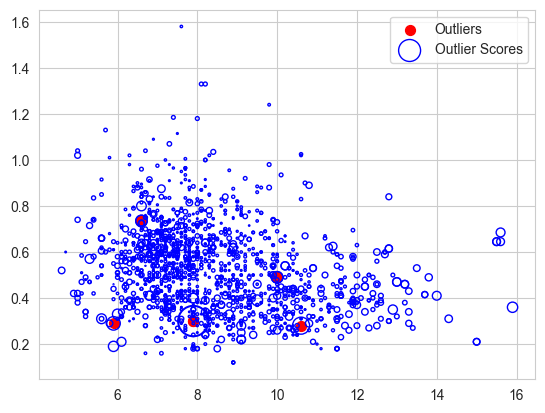

In [57]:

plt.figure()
plt.scatter(x.iloc[outlier_index,0],x.iloc[outlier_index,1],color="red",s=50,label="Outliers");
plt.scatter(x.iloc[:,0],x.iloc[:,1],s=500*radius,edgecolors="b",facecolors="none",label="Outlier Scores");
plt.legend()
plt.show()

# Feature Scaling

In [58]:
X=wine.drop('quality',axis=1)
print(X)
Y = wine['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
print(Y)


      qfixed acidity  volatile acidity  citric acid  residual sugar  \
0                7.4             0.700         0.00             1.9   
1                7.8             0.880         0.00             2.6   
2                7.8             0.760         0.04             2.3   
3               11.2             0.280         0.56             1.9   
4                7.4             0.700         0.00             1.9   
...              ...               ...          ...             ...   
1594             6.2             0.600         0.08             2.0   
1595             5.9             0.550         0.10             2.2   
1596             6.3             0.510         0.13             2.3   
1597             5.9             0.645         0.12             2.0   
1598             6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.076                 11.0                  34.0  0.99780  3

In [59]:
wine.sample(5)
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [60]:
# If wine quality is 7 or above then will consider as good quality wine
wine['goodquality'] = [1 if x >= 7 else 0 for x in wine['quality']]
wine.sample(5)

,qfixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
855,7.6,0.735,0.02,2.5,0.071,10.0,14.0,0.99538,3.51,0.71,11.70,7,1
1542,6.7,0.855,0.02,1.9,0.064,29.0,38.0,0.99472,3.30,0.56,10.75,6,0
1080,10.3,0.270,0.56,1.4,0.047,3.0,8.0,0.99471,3.16,0.51,11.80,6,0
964,8.5,0.470,0.27,1.9,0.058,18.0,38.0,0.99518,3.16,0.85,11.10,6,0
1571,6.4,0.380,0.14,2.2,0.038,15.0,25.0,0.99514,3.44,0.65,11.10,6,0


In [61]:



# See total number of good vs bad wines samples
wine['goodquality'].value_counts()
# Separate depedent and indepedent variables
X = wine.drop(['quality','goodquality'], axis = 1)
Y = wine['goodquality']
print(X)
print(Y)


      qfixed acidity  volatile acidity  citric acid  residual sugar  \
0                7.4             0.700         0.00             1.9   
1                7.8             0.880         0.00             2.6   
2                7.8             0.760         0.04             2.3   
3               11.2             0.280         0.56             1.9   
4                7.4             0.700         0.00             1.9   
...              ...               ...          ...             ...   
1594             6.2             0.600         0.08             2.0   
1595             5.9             0.550         0.10             2.2   
1596             6.3             0.510         0.13             2.3   
1597             5.9             0.645         0.12             2.0   
1598             6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.076                 11.0                  34.0  0.99780  3

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)
print(Y.shape,Y_train.shape,Y_test.shape)


(1599,) (1279,) (320,)


# Logistic Regression

In [63]:
model = LogisticRegression()

In [64]:
model.fit(X_train, Y_train)

c:\Users\yadpu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [65]:
X_test_prediction = model.predict(X_test)
X_test_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,

In [66]:
print('Accuracy: ', accuracy_score(Y_test, X_test_prediction))


Accuracy:  0.89375


In [67]:
data=pd.DataFrame({'Actual':Y_test,"Predicted":X_test_prediction})
data

,Actual,Predicted
147,0,0
937,0,0
877,0,0
1000,1,0
73,0,0
...,...,...
841,0,0
889,0,0
1145,0,0
1476,0,0


In [68]:
print(classification_report(Y_test, X_test_prediction))


              precision    recall  f1-score   support

           0       0.91      0.98      0.94       283
           1       0.60      0.24      0.35        37

    accuracy                           0.89       320
   macro avg       0.75      0.61      0.64       320
weighted avg       0.87      0.89      0.87       320



In [69]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("Mean Absolute Error : ",mean_absolute_error(Y_test,X_test_prediction))
print("Mean Squared Error : ",mean_squared_error(Y_test,X_test_prediction))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(Y_test,X_test_prediction)))
print("R2 Score : ",r2_score(Y_test,X_test_prediction))

Mean Absolute Error :  0.10625
Mean Squared Error :  0.10625
Root Mean Squared Error :  0.32596012026013244
R2 Score :  -0.03906026167510257


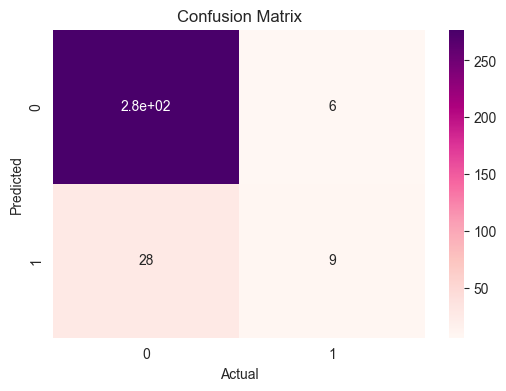

In [70]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(Y_test,X_test_prediction),annot=True,cmap="RdPu")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

# Decision Tree

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt

In [72]:

clf =tree.DecisionTreeClassifier()

In [73]:
clf.fit(X_train,Y_train)

DecisionTreeClassifier()

In [74]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [75]:
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [76]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [77]:
best_clf = grid_search.best_estimator_

In [78]:
d = clf.predict(X_test)
d

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [79]:
cm=confusion_matrix(Y_test,d)
print(cm)

[[265  18]
 [ 15  22]]


In [80]:
print(classification_report(Y_test,d))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       283
           1       0.55      0.59      0.57        37

    accuracy                           0.90       320
   macro avg       0.75      0.77      0.76       320
weighted avg       0.90      0.90      0.90       320



In [81]:
accuracy = accuracy_score(Y_test,d)
print("Accuracy:", accuracy)

Accuracy: 0.896875


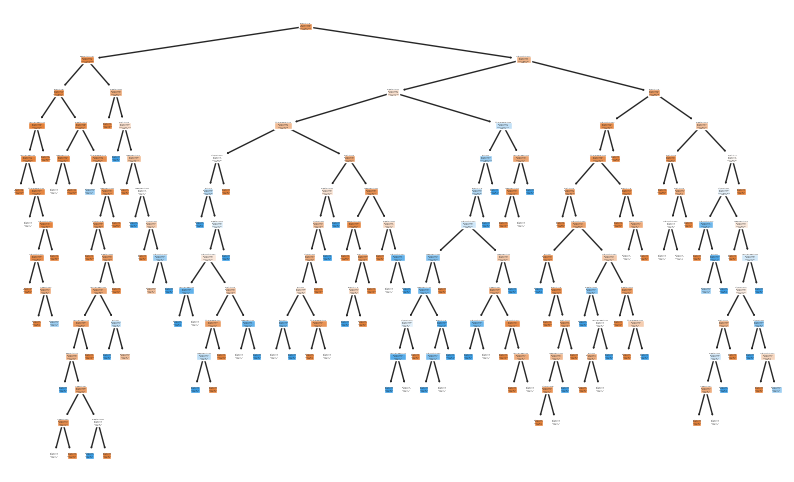

In [82]:
plt.figure(figsize=(10,6))
plot_tree(best_clf, filled=True, feature_names=X.columns, class_names=["5", "6", "7","8"])
plt.show()

# SVM

In [83]:
clf = svm.SVC(C=0.001,kernel='poly',degree=5)
clf.fit(X_train,Y_train)

SVC(C=0.001, degree=5, kernel='poly')

In [84]:

y_pred1 = clf.predict(X_test)
y_pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [85]:
accuracy = accuracy_score(Y_test, y_pred1)
print("Accuracy:", accuracy)

Accuracy: 0.884375


In [86]:
data = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred1})
data


,Actual,Predicted
147,0,0
937,0,0
877,0,0
1000,1,0
73,0,0
...,...,...
841,0,0
889,0,0
1145,0,0
1476,0,0


In [87]:
cm2 = confusion_matrix(Y_test, y_pred1)
print(cm2)

[[283   0]
 [ 37   0]]


In [88]:
print(classification_report(Y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       283
           1       0.00      0.00      0.00        37

    accuracy                           0.88       320
   macro avg       0.44      0.50      0.47       320
weighted avg       0.78      0.88      0.83       320



c:\Users\yadpu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\yadpu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\yadpu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# Random Forest

In [89]:
clf4 = RandomForestClassifier(n_estimators=100, criterion='gini')


In [90]:

clf4.fit(X_train,Y_train)

RandomForestClassifier()

In [91]:
y_pred4 = clf4.predict(X_test)
y_pred4

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [92]:
accuracy = accuracy_score(Y_test, y_pred4)
print("Accuracy:", accuracy)

Accuracy: 0.934375


In [93]:
data = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred4})
data

,Actual,Predicted
147,0,0
937,0,0
877,0,0
1000,1,0
73,0,0
...,...,...
841,0,0
889,0,0
1145,0,0
1476,0,0


In [94]:
cm4 = confusion_matrix(Y_test, y_pred4)
print(cm4)

[[278   5]
 [ 16  21]]


In [95]:
print(classification_report(Y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       283
           1       0.81      0.57      0.67        37

    accuracy                           0.93       320
   macro avg       0.88      0.77      0.82       320
weighted avg       0.93      0.93      0.93       320



# KNeighbors Classifier

In [96]:

knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=7)

In [97]:
y_pred5=knn.predict(X_test)
y_pred5

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [98]:

accuracy = accuracy_score(Y_test, y_pred5)
print("Accuracy:", accuracy)

Accuracy: 0.871875


In [99]:
data = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred5})
data

,Actual,Predicted
147,0,0
937,0,0
877,0,0
1000,1,0
73,0,0
...,...,...
841,0,0
889,0,0
1145,0,0
1476,0,0


In [100]:
cm6= confusion_matrix(Y_test, y_pred5)
print(cm6)

[[269  14]
 [ 27  10]]


In [101]:
print(classification_report(Y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       283
           1       0.42      0.27      0.33        37

    accuracy                           0.87       320
   macro avg       0.66      0.61      0.63       320
weighted avg       0.85      0.87      0.86       320



# Neural Network

In [102]:

wine["quality"] =wine["quality"].astype(int)
wine = pd.get_dummies(wine, columns=["quality"])
wine.head(5)

,qfixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,goodquality,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,False,False,True,False,False,False
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,False,False,True,False,False,False
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,False,False,True,False,False,False
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,False,False,False,True,False,False
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,False,False,True,False,False,False


In [103]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Assuming you've defined 'data' somewhere before
X = data.iloc[:,0:11].values  # first 11 columns
Y = data.iloc[:,12:].values   # columns after the 12th

X = preprocessing.normalize(X, axis=0)

# Splitting the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)


(256, 2) (256, 0) (64, 2) (64, 0)


In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=101)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [105]:
import pandas as pd 
import numpy as np

from keras import layers, optimizers, regularizers
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.models import Sequential

from keras.utils import plot_model
#from kt_utils import *
import keras.backend as K

import seaborn as sns

from sklearn import preprocessing, model_selection 

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [106]:
winemod1 = Sequential()
# layer 1
winemod1.add(Dense(30, input_dim=11, activation='relu', name='fc0',kernel_regularizer=regularizers.l2(0.01)))
winemod1.add(BatchNormalization(momentum=0.99, epsilon=0.001))
#layer 2
winemod1.add(Dense(50, name='fc1',bias_initializer='zeros'))
winemod1.add(BatchNormalization(momentum=0.99, epsilon=0.001))
winemod1.add(Activation('tanh'))
winemod1.add(Dropout(0.5))
#layer 3
winemod1.add(Dense(100, name='fc2',bias_initializer='zeros'))
winemod1.add(BatchNormalization(momentum=0.99, epsilon=0.001))
winemod1.add(Activation('relu'))
winemod1.add(Dropout(0.5))
#layer 4
winemod1.add(Dense(5, name='fc3',bias_initializer='zeros'))
winemod1.add(BatchNormalization(momentum=0.99, epsilon=0.001))
winemod1.add(Activation('softmax'))

c:\Users\yadpu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [107]:
# X_train.shape
winemod1.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ fc0 (Dense)                     │ (None, 30)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30)             │           120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 50)             │         1,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 50)             │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 100)            │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc3 (Dense)                     │ (None, 5)              │           505 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 5)              │            20 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 5)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,255 (32.25 KB)

 Trainable params: 7,885 (30.80 KB)

 Non-trainable params: 370 (1.45 KB)

In [108]:

model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=20,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

# Summary


# So,the best model for this Dataset is RandomForest  with 93.75 % accuracy

# Predict Quality

In [109]:
quality1=[7.5,
          0.5,
          0.36,
          6.1,
          0.071,
          17.0,
          102.0,
          0.9978,
          3.35,
          0.8,
          10.5]


In [110]:
quality1=np.array([quality1])
print(quality1)
clf.predict(quality1)

[[7.500e+00 5.000e-01 3.600e-01 6.100e+00 7.100e-02 1.700e+01 1.020e+02
  9.978e-01 3.350e+00 8.000e-01 1.050e+01]]


c:\Users\yadpu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [111]:
pred=clf.predict(quality1)
if pred[0]==1:
    print("Good quality wine")
else:
    print("Bad Quality Wine")

Bad Quality Wine


c:\Users\yadpu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
